In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df = pd.read_csv('datasets/WineQT.csv')

In [220]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [222]:
df = df.drop(columns=['Id'])

In [224]:
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df = df.drop(columns=['quality'])

In [226]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
228,9.6,0.770,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4,1
298,6.4,0.670,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4,1
712,8.0,0.580,0.16,2.0,0.120,3.0,7.0,0.99454,3.22,0.58,11.2,1
540,6.3,0.980,0.01,2.0,0.057,15.0,33.0,0.99488,3.60,0.46,11.2,1
545,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,0


# Train test split
### first split dataset into x(input) and y(output)

In [230]:
x=df.drop(columns=['quality_binary'])
y=df['quality_binary']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Scaling by StandardScaler (Standardization)
### NOTE apply sklearn scaler function  on x_train to fit only and
### apply transform in both x_train and x_test,howwever we donot appply scalar function in y(expect in regression with wide range of value)

In [232]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled =scaler.transform(x_train)
x_test_scaled =scaler.transform(x_test)

In [234]:
x_train_scaled= pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [236]:
np.round(x_train_scaled.describe(),1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.2,-2.3,-1.4,-1.2,-1.6,-1.4,-1.2,-3.5,-3.8,-2.0,-1.9
25%,-0.7,-0.7,-0.9,-0.5,-0.3,-0.9,-0.8,-0.6,-0.7,-0.6,-0.9
50%,-0.2,-0.1,-0.1,-0.2,-0.2,-0.3,-0.2,-0.0,-0.0,-0.2,-0.2
75%,0.4,0.6,0.8,0.1,0.1,0.5,0.5,0.6,0.6,0.4,0.7
max,4.3,5.9,3.8,9.9,11.1,5.1,7.3,3.4,4.6,8.1,3.3


In [238]:
x_train_scaled.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
206,-0.447142,-0.843913,1.561008,-0.167885,0.411808,-1.046414,-1.060375,-0.330690,0.299490,-0.636208,0.894456
608,-0.329178,-0.564504,-0.081071,0.061998,-0.284239,1.299196,0.537773,-0.278425,0.364929,-0.455545,0.056613
304,1.912147,-0.676267,1.304433,0.368509,-0.136592,1.299196,0.287083,1.786019,-0.354906,1.351086,0.522081
597,0.142680,-0.899795,0.278134,-0.551024,-0.431885,1.005995,0.161738,-1.109429,0.430369,0.387549,1.266830
630,-0.860018,0.553132,-1.004740,-0.321141,0.053239,-0.460012,-0.057615,-0.722673,1.019324,-0.636208,-0.036480


# Effect of Scaling

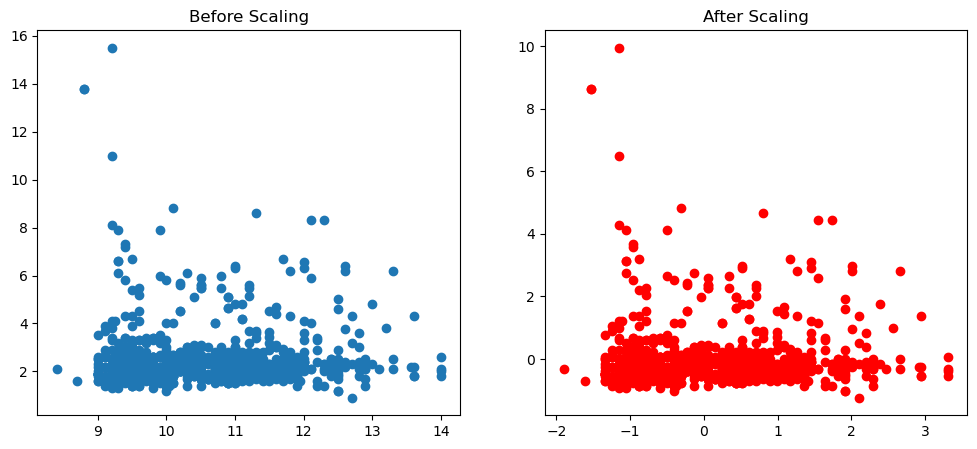

In [88]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['alcohol'], x_train['residual sugar'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['alcohol'], x_train_scaled['residual sugar'],color='red')
ax2.set_title("After Scaling")
plt.show()

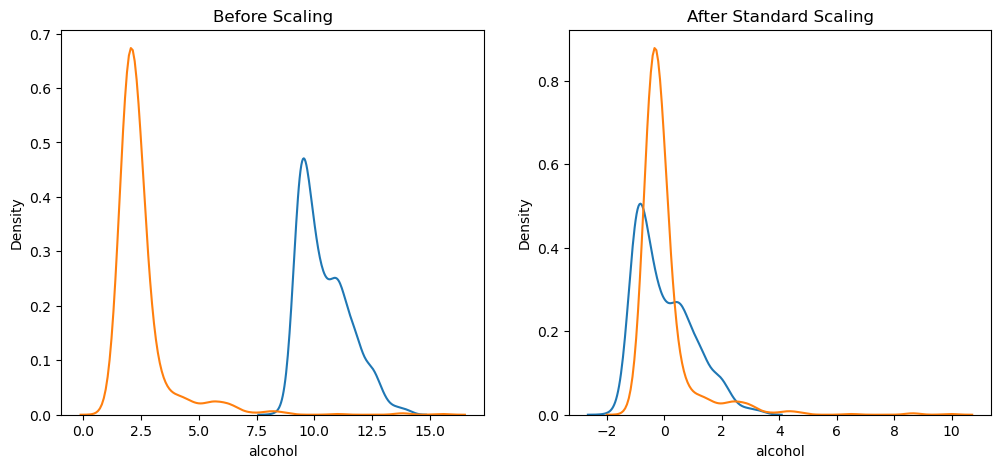

In [90]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)
sns.kdeplot(x_train['residual sugar'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['residual sugar'], ax=ax2)
plt.show()

# Comparison of Distributions

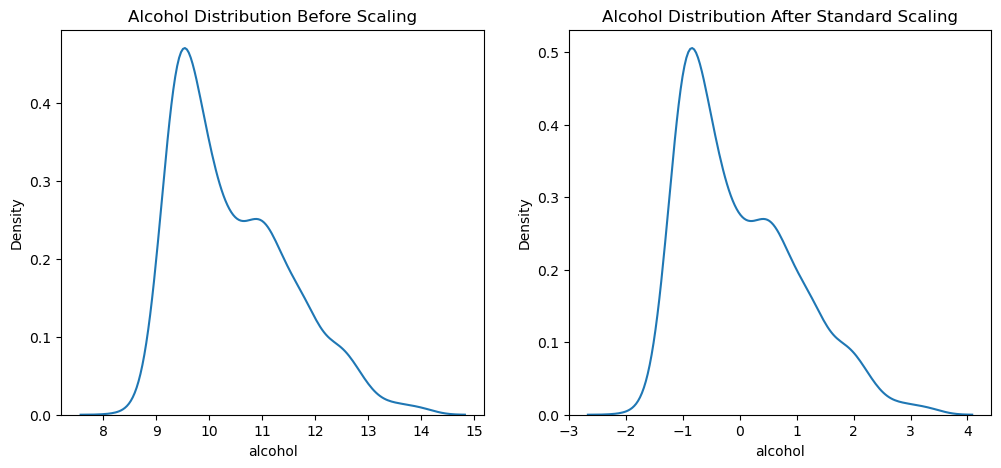

In [95]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
plt.show()

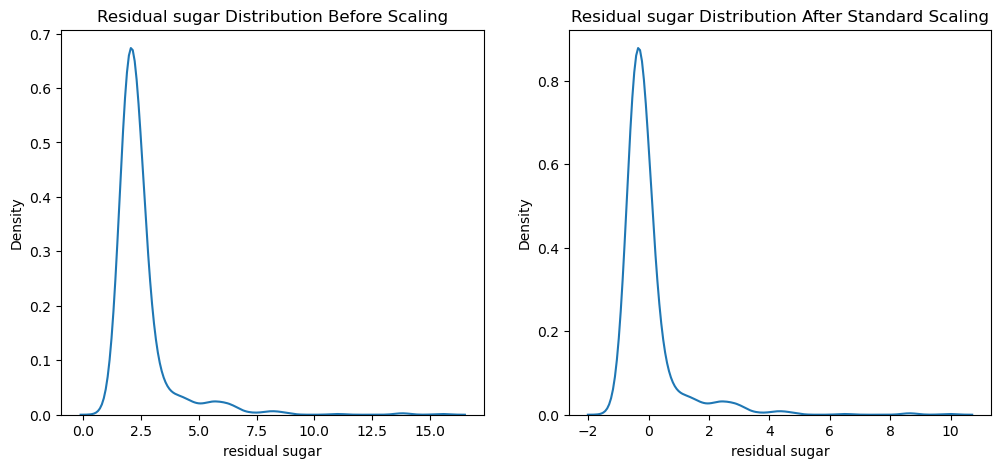

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Residual sugar Distribution Before Scaling')
sns.kdeplot(x_train['residual sugar'], ax=ax1)

# after scaling
ax2.set_title('Residual sugar Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['residual sugar'], ax=ax2)
plt.show()

# Why scaling is important?

In [240]:
from sklearn.linear_model import LogisticRegression

In [276]:
log_reg = LogisticRegression()
log_reg_scaled = LogisticRegression()

In [278]:
log_reg.fit(x_train,y_train)

C:\Users\Roshan848\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [280]:
log_reg_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [282]:
y_pred = log_reg.predict(x_test)
y_pred_scaled = log_reg_scaled.predict(x_test_scaled)

# Check accuracy before and after scaling

In [284]:
from sklearn.metrics import accuracy_score

In [286]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.7554585152838428
Scaled 0.7685589519650655


## 🔍 Observation: Logistic Regression Without Scaling

When fitting Logistic Regression without scaling, I received the following warning:

> ConvergenceWarning: lbfgs failed to converge (status=1)

This occurred because some features had very different ranges (e.g., alcohol vs. fixed acidity), making optimization harder.

### 🧪 Fix: StandardScaler

Applying StandardScaler to the dataset removed the warning **without needing to increase max_iter**, and also improved accuracy.

| Model            | Scaling Used     | Warning       | Accuracy |
|------------------|------------------|---------------|----------|
| LogisticRegression | ❌ No           | ⚠️ Yes        | 75.5%    |
| LogisticRegression | ✅ StandardScaler | ✅ No        | 76.8%    |
